In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/documentation.pdf
/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [4]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


**Question 1: Is there a relationship between age and the likelihood of heart disease?**

Hypothesis Test: Pearson correlation between age and target (presence of heart disease).

In [6]:
from scipy.stats import pearsonr
stat, pval = pearsonr(df.age, df.target)
if pval < 0.05:
    print('Reject null hypothesis.')
    print('There is a statistically proven correlation between age and the likelihood of heart disease.')
else:
    print('Fail to reject null hypothesis.')
    print('There is no evidence of a correlation between age and likelihood of heart disease.')

Reject null hypothesis.
There is a statistically proven correlation between age and the likelihood of heart disease.


**Question 2: How does chest pain type relate to the presence of heart disease?**

Hypothesis Test: Chi-square test of independence between chest pain type and target.

In [7]:
from scipy.stats import chi2_contingency
cross = pd.crosstab(df['chest pain type'],df['target'])
chi2,pval,_,_ = chi2_contingency(cross)
if pval<0.05:
    print('Reject null hypothesis.')
    print('There is an association between chest pain type and target.')
else:
    print('Fail to reject null hypothesis.')
    print('There is no association between chest pain type and target.')

Reject null hypothesis.
There is an association between chest pain type and target.


**Question 3: Are certain levels of resting blood pressure associated with a higher risk of heart disease?**

Hypothesis Test: ANOVA test comparing mean resting blood pressure across different levels of target.

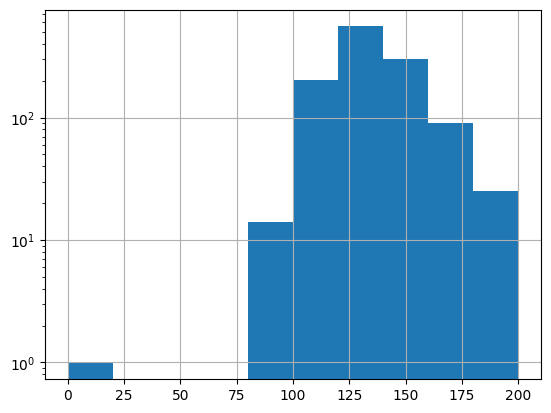

In [8]:
df['resting bp s'].hist()
plt.yscale('log')

In [9]:
from scipy.stats import ttest_ind
target1 = df.loc[df.target==1,'resting bp s']
target2 = df.loc[df.target==0,'resting bp s']
tstat, pval = ttest_ind(target1, target2)

if pval<0.05:
    print('Reject the null hypothesis.')
    print('There is statistically significant evidence to prove that certain levels of resting blood pressure are associated with a higher risk of heart disease.')
else:
    print('Fail to reject null hypothesis.')
    print('There is no statistically significant evidence to prove that certain levels of resting blood pressure are associated with a higher risk of heart disease.')

Reject the null hypothesis.
There is statistically significant evidence to prove that certain levels of resting blood pressure are associated with a higher risk of heart disease.


**Question 4: Does cholesterol level impact the likelihood of heart disease?**

Hypothesis Test: Independent samples t-test comparing mean cholesterol levels between individuals with and without heart disease.

In [12]:
h_chol = df.loc[df.target==1,'cholesterol']
no_h_chol = df.loc[df.target==0,'cholesterol']

tstat, pval = ttest_ind(h_chol, no_h_chol)

if pval<0.05:
    print('Reject null hypothesis.')
    print('Cholesterol level has an impact on the likelihood of heart disease.')
else:
    print('Fail to reject null hypothesis.')
    prinbt('There is no statistical evidence to prove that cholesterol level has an impact on the likelihood of heart disease.')

Reject null hypothesis.
Cholesterol level has an impact on the likelihood of heart disease.


**Question 5: Is there an association between fasting blood sugar and the presence of heart disease?**

Hypothesis Test: Chi-square test of independence between fasting blood sugar and target.

In [15]:
from scipy.stats import chi2_contingency
cross = pd.crosstab(df['fasting blood sugar'],df['target'])
chi2, pval, _,_ = chi2_contingency(cross)

if pval<0.05:
    print('Reject null hypothesis.')
    print("There is statistical evidence to prove that there is an association between fasting blood sugar and the presence of heart disease.")
else:
    print('Fail to reject null hypothesis.')
    print('There is no statistical evidence to prove that there is an association between fasting blood sugar and the presence of heart disease.')


Reject null hypothesis.
There is statistical evidence to prove that there is an association between fasting blood sugar and the presence of heart disease.


**Question 6: How does resting electrocardiographic results relate to heart disease?**

Hypothesis Test: Chi-square test of independence between resting ecg and target.

In [16]:
cross = pd.crosstab(df['resting ecg'],df['target'])
chi2, pval, _,_ = chi2_contingency(cross)

if pval<0.05:
    print('Reject null hypothesis.')
    print("There is statistical evidence to prove that there is an association between resting electrocardiographic results and the presence of heart disease.")
else:
    print('Fail to reject null hypothesis.')
    print('There is no statistical evidence to prove that there is an association between resting electrocardiographic results and the presence of heart disease.')


Reject null hypothesis.
There is statistical evidence to prove that there is an association between resting electrocardiographic results and the presence of heart disease.


**Question 7: Does maximum heart rate differ significantly between individuals with and without heart disease?**

Hypothesis Test: Independent samples t-test comparing mean maximum heart rate between individuals with and without heart disease.

In [17]:
h_hr = df.loc[df.target==1,'max heart rate']
no_h_hr = df.loc[df.target==0,'max heart rate']
tstat, pval = ttest_ind(h_hr, no_h_hr)

if pval<0.05:
    print('Reject null hypothesis.')
    print('There is statistical evidence that maximum heart rate differ significantly between individuals with and without heart disease')
else:
    print('Fail to reject null hypothesis.')
    print('There is no statistical evidence that maximum heart rate differ significantly between individuals with and without heart disease')

Reject null hypothesis.
There is statistical evidence that maximum heart rate differ significantly between individuals with and without heart disease


**Question 8: Is there a relationship between exercise-induced angina and heart disease?**

Hypothesis Test: Chi-square test of independence between exercise angina and target.

In [19]:
cross = pd.crosstab(df['exercise angina'],df['target'])
chi2, pval, _,_ = chi2_contingency(cross)

if pval<0.05:
    print('Reject null hypothesis.')
    print("There is statistical evidence to prove that there is an association between exercise-induced angina and heart disease.")
else:
    print('Fail to reject null hypothesis.')
    print('There is no statistical evidence to prove that there is an association between exercise-induced angina and heart disease.')


Reject null hypothesis.
There is statistical evidence to prove that there is an association between exercise-induced angina and heart disease.


**Question 9: How does the ST segment slope relate to the presence of heart disease?**

Hypothesis Test: Chi-square test of independence between ST slope and target.

In [20]:
cross = pd.crosstab(df['ST slope'],df['target'])
chi2, pval, _,_ = chi2_contingency(cross)

if pval<0.05:
    print('Reject null hypothesis.')
    print("There is statistical evidence to prove that there is an association between ST slope and target.")
else:
    print('Fail to reject null hypothesis.')
    print('There is no statistical evidence to prove that there is an association between ST slope and target.')


Reject null hypothesis.
There is statistical evidence to prove that there is an association between ST slope and target.


**Question 10: Are individuals with higher levels of oldpeak more likely to have heart disease?**

Hypothesis Test: Independent samples t-test comparing mean oldpeak levels between individuals with and without heart disease.

In [18]:
h_peak = df.loc[df.target==1,'oldpeak']
no_h_peak = df.loc[df.target==0,'oldpeak']
tstat, pval = ttest_ind(h_peak, no_h_peak)

if pval<0.05:
    print('Reject null hypothesis.')
    print('There is statistical evidence that individuals with higher levels of oldpeak more likely to have heart disease.')
else:
    print('Fail to reject null hypothesis.')
    print('There is no statistical evidence that individuals with higher levels of oldpeak more likely to have heart disease.')

Reject null hypothesis.
There is statistical evidence that individuals with higher levels of oldpeak more likely to have heart disease.
